# Playing with coordinates

In this notebook we propose you to explore more in details the internals of the DataArray structure. In particular, this structure is capable of storing additional so called "non-dimensional" coordinates (in the sense their name does not give the dimension name to the axis they are attached to). This is can be usefull for example to:

- Attach the cable geographical coordinates to the distance axis. 
- Attach name to your channels.
- Have both an absolute and a relative time axis.

In [1]:
import numpy as np
import xdas as xd

Let load a use case:

In [2]:
da = xd.open_dataarray(
    "/data/baillet/tuto_xdas/dataarray.nc", engine=None
)  # by default Xdas NetCDF
da

<xdas.DataArray (time: 112500, distance: 10000)>
VirtualSource: 2.1GB (int16)
Coordinates:
  * time (time): 2023-11-03T12:00:01.000 to 2023-11-03T12:30:00.984
  * distance (distance): 0.000 to 153179.709

### Replace existing coordinates

You can update any existing `Coordinate` object by assigning new values. The replacement data can be anything that the `Coordinate` constructor accepts and it must match the dimension size.

In [3]:
# here the replaced coordinate will be an interpolated coordinate
distance = {
    "tie_indices": [0, da.sizes["distance"] - 1],
    "tie_values": [0.0, 150.0],
}
da = da.assign_coords(distance=distance)
da

<xdas.DataArray (time: 112500, distance: 10000)>
VirtualSource: 2.1GB (int16)
Coordinates:
  * time (time): 2023-11-03T12:00:01.000 to 2023-11-03T12:30:00.984
  * distance (distance): 0.000 to 150.000

### Add new coordinates 

If the coordinate you assign does not exist it will be added. In that case you must provide a tuple with two values:

- the dimension to which the coordinate will be attached
- the data of the new coordinate

In [4]:
# here the added coordinate will be a dense coordinate
latitude = np.linspace(-40, -20, da.sizes["distance"])
da = da.assign_coords(latitude=("distance", latitude))
da

<xdas.DataArray (time: 112500, distance: 10000)>
VirtualSource: 2.1GB (int16)
Coordinates:
  * time (time): 2023-11-03T12:00:01.000 to 2023-11-03T12:30:00.984
  * distance (distance): 0.000 to 150.000
    latitude (distance): [-40. ... -20.]

### Swap dimensions

Now that a new dimension was added we can decide to use it as the main "dimensional" coordinate. Be carefull to use a strictly monotonic coordinate if you want the selections to work.

In [5]:
da = da.swap_dims({"distance": "latitude"})
da

<xdas.DataArray (time: 112500, latitude: 10000)>
VirtualSource: 2.1GB (int16)
Coordinates:
  * time (time): 2023-11-03T12:00:01.000 to 2023-11-03T12:30:00.984
    distance (latitude): 0.000 to 150.000
  * latitude (latitude): [-40. ... -20.]

You can now make a selections on the new coordinates:

In [6]:
da = da.sel(
    time=slice("2023-11-03T12:26:40", "2023-11-03T12:27:50"),
    latitude=slice(-39, -25),
)
da

<xdas.DataArray (time: 4375, latitude: 7000)>
VirtualSource: 58.4MB (int16)
Coordinates:
  * time (time): 2023-11-03T12:26:40.008 to 2023-11-03T12:27:49.992
    distance (latitude): 7.501 to 112.496
  * latitude (latitude): [-38.99989999 ... -25.00050005]

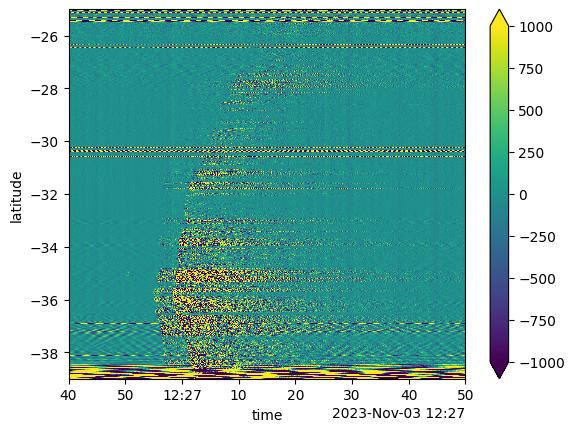

In [7]:
da.plot(x="time", yincrease=True, vmin=-1000, vmax=1000)